# Linear Regression

Objective: Predict SoyaBeanOil price from PalmOilPrice  
Dataset: sawit.csv  
Ref: NA

In [1]:
import matplotlib.pyplot as plot
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

pd.options.display.float_format = '{:,.2f}'.format
float_formatter = lambda x: "%.4f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv('sawit.csv')
print('Dataset size:', data.shape)
data.head()

Dataset size: (156, 10)


,MonthYear,CrudePalmOil,SoyabeanOil,GroundnutOil,SunflowerOil,RapeseedOil,CoconutOil,FishOil,Tallow,Lard
0,01/01/2006,424,532,930,591,733,569,750,445,407
1,01/02/2006,445,535,921,595,723,591,761,430,405
2,01/03/2006,440,539,902,606,742,575,807,410,431
3,01/04/2006,439,540,899,659,796,578,840,394,437
4,01/05/2006,440,588,892,679,838,583,841,408,447


In [2]:
data.describe()

,CrudePalmOil,SoyabeanOil,GroundnutOil,SunflowerOil,RapeseedOil,CoconutOil,FishOil,Tallow,Lard
count,156.00,156.00,156.00,156.00,156.00,156.00,156.00,156.00,156.00
mean,777.48,929.63,"1,387.40",969.83,973.12,"1,127.04","1,454.44",836.81,777.35
std,230.76,262.23,546.80,339.96,263.38,394.25,496.34,247.82,234.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,659.50,787.50,"1,201.50",800.00,814.00,839.50,977.25,734.50,629.25
50%,761.00,880.50,"1,351.50",880.00,895.00,"1,127.00","1,562.00",834.50,753.00
75%,905.25,"1,139.25","1,655.75","1,211.25","1,184.75","1,436.75","1,785.75","1,022.00",928.50
max,"1,292.00","1,537.00","2,555.00","2,045.00","1,577.00","2,256.00","2,400.00","1,363.00","1,392.00"


## Correlation

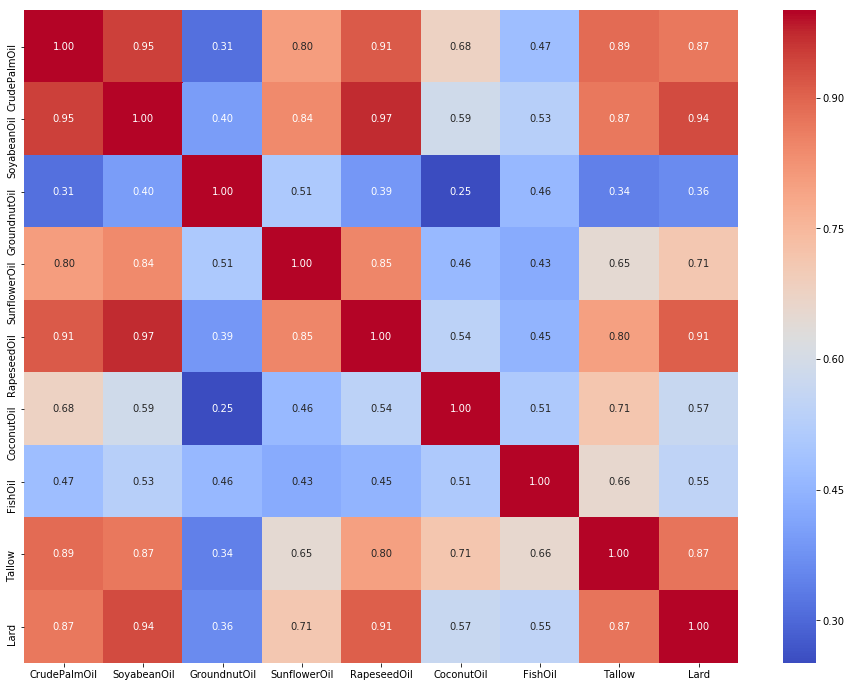

In [3]:
import seaborn as sns
plot.figure(figsize=(16,12))
sns.heatmap(data=data.iloc[:,1:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plot.show()

In [4]:
corr_rank = data.corr()
corr_rank["SoyabeanOil"].sort_values(ascending=False)

SoyabeanOil    1.00
RapeseedOil    0.97
CrudePalmOil   0.95
Lard           0.94
Tallow         0.87
SunflowerOil   0.84
CoconutOil     0.59
FishOil        0.53
GroundnutOil   0.40
Name: SoyabeanOil, dtype: float64

## Feature and Target

In [5]:
data.drop(['MonthYear','GroundnutOil','SunflowerOil','CrudePalmOil','CoconutOil','FishOil','Tallow','Lard'],axis=1,inplace=True)
data.head()

,SoyabeanOil,RapeseedOil
0,532,733
1,535,723
2,539,742
3,540,796
4,588,838


In [6]:
def change_column_order(data, col_name, index):
    cols = data.columns.tolist()
    cols.remove(col_name)
    cols.insert(index, col_name)
    return data[cols]

data = change_column_order(data, 'RapeseedOil', 0)
data.head()

,RapeseedOil,SoyabeanOil
0,733,532
1,723,535
2,742,539
3,796,540
4,838,588


In [7]:
#define feature and target data
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

#split data to 10-test, 2-train
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size = 1/3, random_state=0)

## Linear Regression

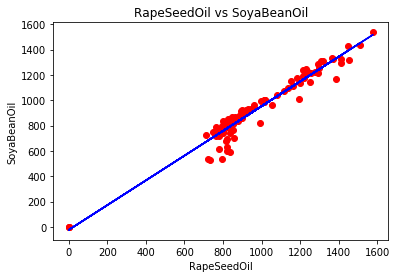

In [8]:
#linear Regression
lr = LinearRegression()
lr.fit(xTrain, yTrain)
yPred = lr.predict(xTest)

#plot chart 
plot.scatter(xTrain, yTrain, color='red')
plot.plot(xTrain, lr.predict(xTrain),color='blue')
plot.title('RapeSeedOil vs SoyaBeanOil')
plot.xlabel('RapeSeedOil')
plot.ylabel('SoyaBeanOil')
plot.show()

In [9]:
#print model score, coef and intercept
print('Model score :', round(lr.score(xTrain, yTrain),4))
print('Coef        :', lr.coef_)
print('Intercept   :', round(lr.intercept_,4))

Model score : 0.9455
Coef        : [0.9776]
Intercept   : -23.8953


## Prediction

In [10]:
#prediction using given data
new_rso = 800
predict_sbo = lr.predict([[new_rso]])
predict_sbo

array([758.1679])